In [3]:
import vnpy_crypto
vnpy_crypto.init()
from vnpy_ctastrategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy_ctastrategy.strategies.atr_rsi_strategy import AtrRsiStrategy
from vnpy_ctastrategy.strategies.boll_channel_strategy import BollChannelStrategy
from vnpy_ctastrategy.strategies.dual_thrust_strategy import DualThrustStrategy
from datetime import datetime
from vnpy.trader.constant import Exchange, Interval
import quantstats as qs
import pandas as pd
from importlib import reload
import vnpy_portfoliostrategy
reload(vnpy_portfoliostrategy)

<module 'vnpy_portfoliostrategy' from '/home/shell007/anaconda3/envs/vnpy/lib/python3.10/site-packages/vnpy_portfoliostrategy/__init__.py'>

In [4]:
def run_backtesting(strategy_class, setting, vt_symbol, interval, start, end, rate, slippage, size, pricetick, capital):
    engine = BacktestingEngine()
    engine.set_parameters(
        vt_symbol=vt_symbol,
        interval=interval,
        start=start,
        end=end,
        rate=rate,
        slippage=slippage,
        size=size,
        pricetick=pricetick,
        capital=capital    
    )
    engine.add_strategy(strategy_class, setting)
    engine.load_data()
    engine.run_backtesting()
    df = engine.calculate_result()
    return df

def show_portafolio(df):
    engine = BacktestingEngine()
    engine.calculate_statistics(df)
    engine.show_chart(df)

In [5]:
results = run_backtesting(
    strategy_class=AtrRsiStrategy, 
    setting={}, 
    vt_symbol="BTCUSD.BINANCE",
    interval=Interval.DAILY,
    start= datetime(2018, 1, 1), 
    end= datetime(2023, 2, 5),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.1,
    capital=1_000_000,
    )

2023-06-07 16:06:21.765417	开始加载历史数据
2023-06-07 16:06:21.765502	加载进度：# [0%]
2023-06-07 16:06:21.826978	加载进度：# [10%]
2023-06-07 16:06:21.839267	加载进度：## [20%]
2023-06-07 16:06:21.850279	加载进度：### [30%]
2023-06-07 16:06:21.860617	加载进度：#### [40%]
2023-06-07 16:06:21.871844	加载进度：##### [50%]
2023-06-07 16:06:21.882481	加载进度：###### [60%]
2023-06-07 16:06:21.892747	加载进度：####### [70%]
2023-06-07 16:06:21.902947	加载进度：######## [80%]
2023-06-07 16:06:21.913237	加载进度：######### [90%]
2023-06-07 16:06:21.923900	加载进度：########## [100%]
2023-06-07 16:06:21.924860	历史数据加载完成，数据量：1862
2023-06-07 16:06:21.925797	策略初始化完成
2023-06-07 16:06:21.925855	开始回放历史数据
2023-06-07 16:06:21.930018	回放进度：= [0%]
2023-06-07 16:06:21.937628	回放进度：== [10%]
2023-06-07 16:06:21.944614	回放进度：=== [20%]
2023-06-07 16:06:21.951371	回放进度：==== [30%]
2023-06-07 16:06:21.958480	回放进度：===== [40%]
2023-06-07 16:06:21.966455	回放进度：====== [50%]
2023-06-07 16:06:21.975450	回放进度：======= [60%]
2023-06-07 16:06:21.983364	回放进度：======== [70%]
2023-06-07 16:06

In [6]:
results.index = pd.to_datetime(results.index)

In [7]:
show_portafolio(results)

2023-06-07 16:06:22.098095	开始计算策略统计指标
2023-06-07 16:06:22.109065	------------------------------
2023-06-07 16:06:22.109154	首个交易日：	2018-01-01 00:00:00
2023-06-07 16:06:22.109167	最后交易日：	2023-02-05 00:00:00
2023-06-07 16:06:22.109173	总交易日：	1862
2023-06-07 16:06:22.109179	盈利交易日：	116
2023-06-07 16:06:22.109185	亏损交易日：	369
2023-06-07 16:06:22.109195	起始资金：	1,000,000.00
2023-06-07 16:06:22.109204	结束资金：	10,377,326.47
2023-06-07 16:06:22.109211	总收益率：	937.73%
2023-06-07 16:06:22.109218	年化收益：	120.87%
2023-06-07 16:06:22.109224	最大回撤: 	-1,784,471.50
2023-06-07 16:06:22.109230	百分比最大回撤: -65.04%
2023-06-07 16:06:22.109236	最长回撤天数: 	100
2023-06-07 16:06:22.109242	总盈亏：	9,377,326.47
2023-06-07 16:06:22.109249	总手续费：	99,196.53
2023-06-07 16:06:22.109255	总滑点：	28,920.00
2023-06-07 16:06:22.109262	总成交金额：	3,306,551,145.00
2023-06-07 16:06:22.109268	总成交笔数：	482
2023-06-07 16:06:22.109275	日均盈亏：	5,036.16
2023-06-07 16:06:22.109281	日均手续费：	53.27
2023-06-07 16:06:22.109287	日均滑点：	15.53
2023-06-07 16:06:22.109293	日均成交金额：	

In [8]:
results

,close_price,pre_close,trades,trade_count,start_pos,end_pos,turnover,commission,slippage,trading_pnl,holding_pnl,total_pnl,net_pnl,balance,return,highlevel,drawdown,ddpercent
date,,,,,,,,,,,,,,,,,,
2018-01-01,13444.88,1.00,[],0,0,0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,1.000000e+06,0.000000,1.000000e+06,0.00000,0.000000
2018-01-02,14754.13,13444.88,[],0,0,0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,1.000000e+06,0.000000,1.000000e+06,0.00000,0.000000
2018-01-03,15156.62,14754.13,[],0,0,0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,1.000000e+06,0.000000,1.000000e+06,0.00000,0.000000
2018-01-04,15180.08,15156.62,[],0,0,0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,1.000000e+06,0.000000,1.000000e+06,0.00000,0.000000
2018-01-05,16954.78,15180.08,[],0,0,0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,1.000000e+06,0.000000,1.000000e+06,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,23730.52,23129.70,[],0,0,0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,1.045579e+07,0.000000,1.091036e+07,-454575.31272,-4.166455
2023-02-02,23470.80,23730.52,"[TradeData(gateway_name='BACKTESTING', extra=N...",1,0,1,7119156.0,213.57468,60.0,-77916.0,-0.0,-77916.0,-78189.57468,1.037760e+07,-0.007506,1.091036e+07,-532764.88740,-4.883109
2023-02-03,23437.21,23470.80,"[TradeData(gateway_name='BACKTESTING', extra=N...",1,1,0,7041240.0,211.23720,60.0,10077.0,-10077.0,0.0,-271.23720,1.037733e+07,-0.000026,1.091036e+07,-533036.12460,-4.885595


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2018-01-01  2018-01-01
End Period                 2023-02-05  2023-02-05
Risk-Free Rate             0.0%        0.0%
Time in Market             27.0%       100.0%

Cumulative Return          937.73%     70.63%
CAGR﹪                     58.23%      11.05%

Sharpe                     0.78        0.43
Prob. Sharpe Ratio         99.19%      87.84%
Smart Sharpe               0.78        0.43
Sortino                    1.6         0.61
Smart Sortino              1.6         0.61
Sortino/√2                 1.13        0.43
Smart Sortino/√2           1.13        0.43
Omega                      1.58        1.58

Max Drawdown               -65.04%     -81.18%
Longest DD Days            558         1045
Volatility (ann.)          64.16%      61.92%
R^2                        0.0         0.0
Information Ratio          0.02        0.02
Calmar                     0.9        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-06-27,2020-12-02,2021-01-05,558,-65.038848,-65.027906
2,2021-01-08,2021-01-29,2021-04-23,105,-48.396536,-48.386131
3,2018-11-20,2019-04-26,2019-05-13,174,-30.655242,-30.647852
4,2018-06-14,2018-07-23,2018-08-08,55,-22.480550,-22.467891
5,2019-05-16,2019-06-08,2019-06-22,37,-17.129873,-17.121954


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


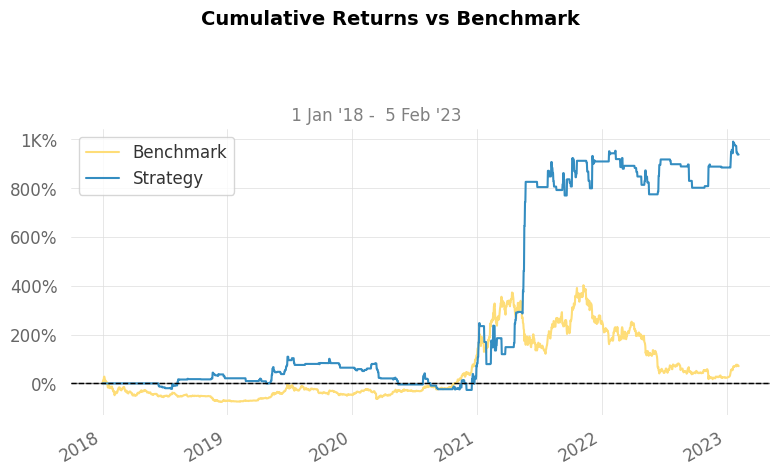

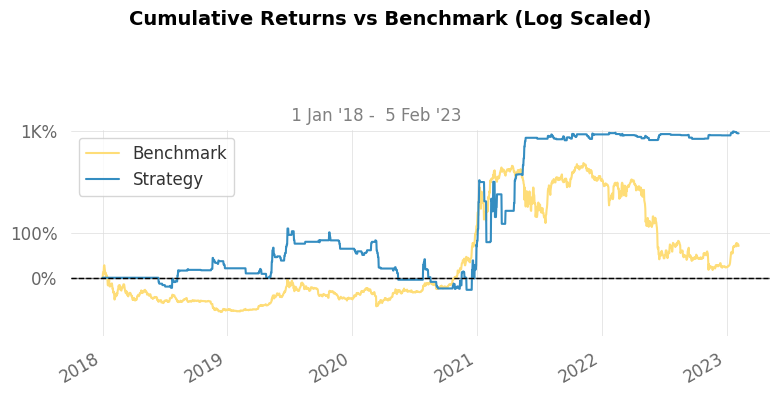

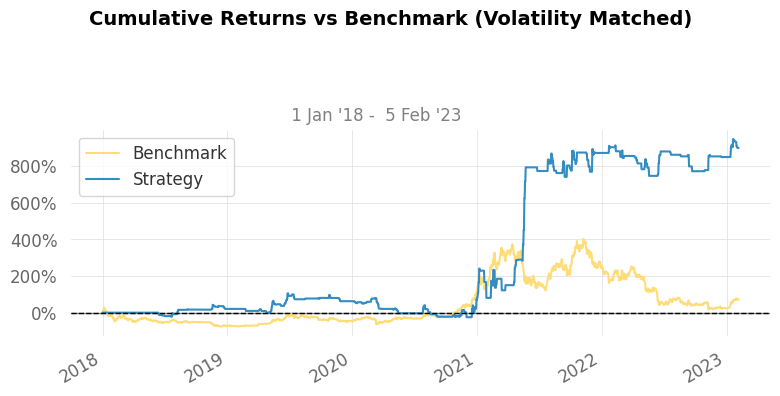

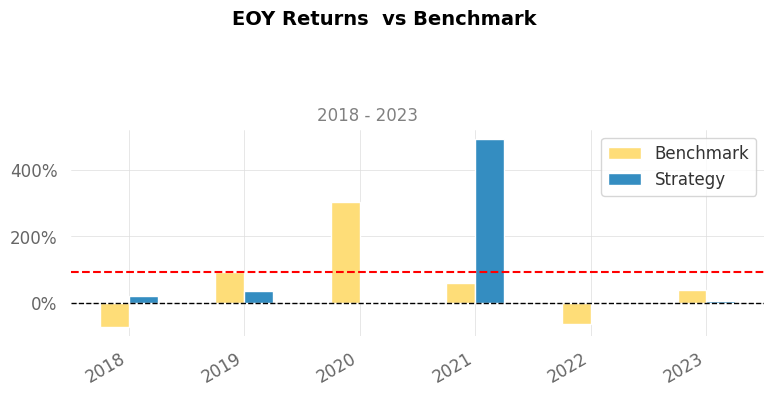

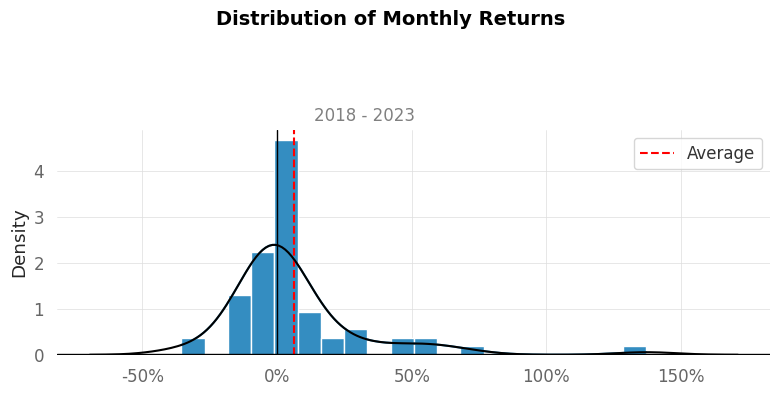

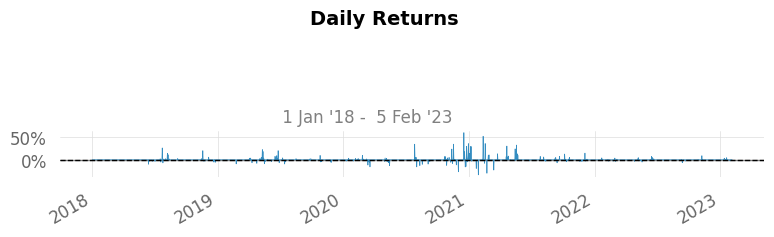

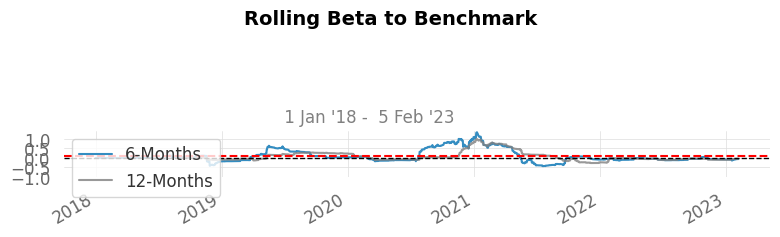

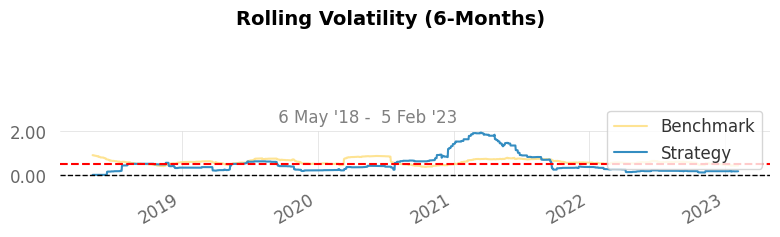

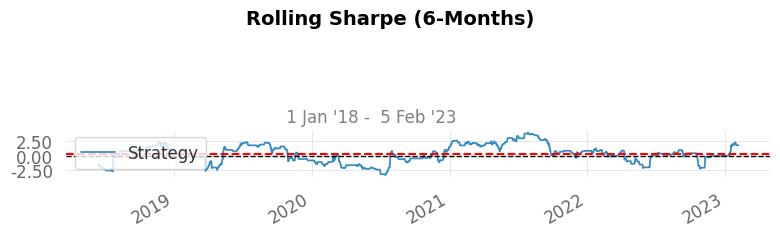

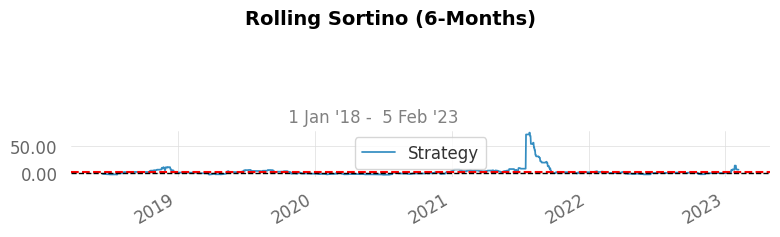

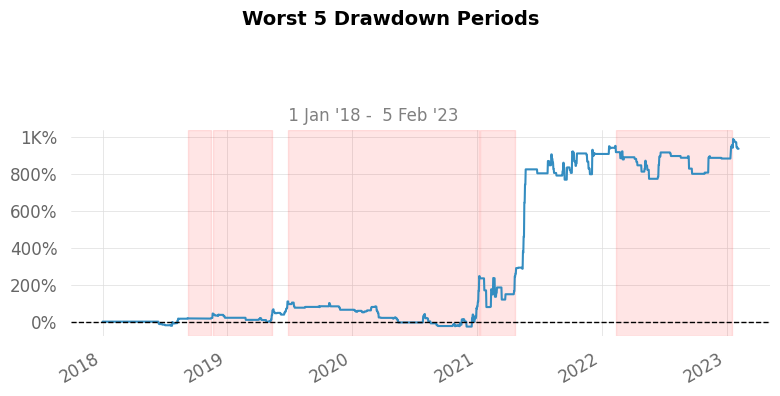

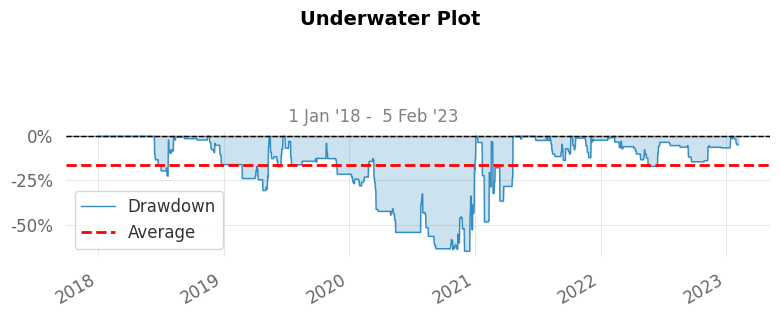

/home/shell007/anaconda3/envs/vnpy/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



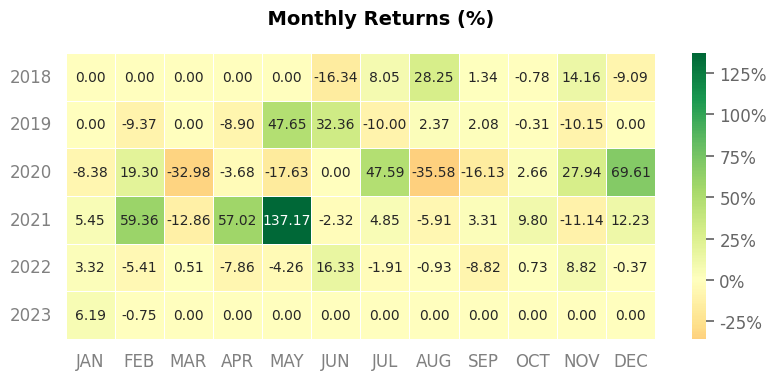

/home/shell007/anaconda3/envs/vnpy/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



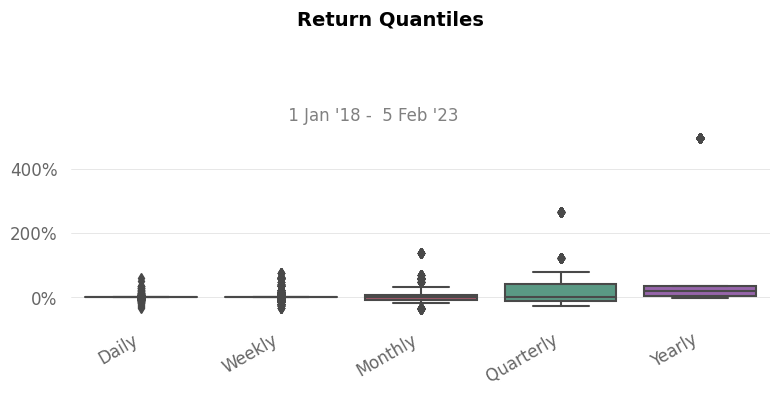

In [9]:
qs.reports.full(results['balance'], benchmark = results['close_price'])